In [67]:
import numpy as np
from keras.utils import to_categorical
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler

In [70]:
X_train = np.load('X_train_5_clases.npy')
X_test = np.load('X_test_5_clases.npy')
y_train = np.load('y_train_5_clases.npy')
y_test = np.load('y_test_5_clases.npy')

# Paso los datos a one_hot_encoding
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

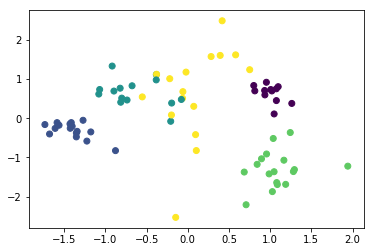

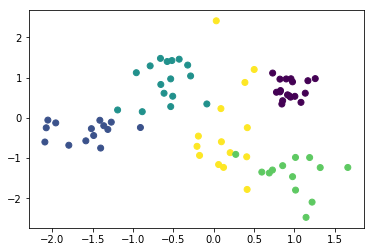

In [71]:
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=y_train)
plt.show()
plt.scatter(X_test_scaled[:,0], X_test_scaled[:,1], c=y_test)
plt.show()

In [72]:
from keras.models import Sequential
from keras import optimizers
from keras.layers.core import Dense, Activation
from helper import PlotLosses
from keras.callbacks import ModelCheckpoint
from keras.initializers import RandomNormal
from keras import regularizers

In [79]:
input_features = 2
lambd = 0.1
hidden_units = 20
output_size = y_train_cat.shape[1]
model = Sequential()
model.add(Dense(hidden_units,input_dim=input_features, kernel_regularizer=regularizers.l2(lambd), name="Capa_Oculta"))
model.add(Activation('elu', name="sigmoid"))
model.add(Dense(output_size, name="Salida"))
model.add(Activation('softmax', name="softmax")) # Notar que en vez de sigmoidea es softmax
model.summary()

lr = 0.01
batch_size = 20
epochs = 200

#selectedOptimizer = optimizers.SGD(lr=lr)
selectedOptimizer = optimizers.adam(lr=lr)

# Lo compilo, notar que en vez de binary_crossentropy va categorical_crossentropy
model.compile(loss = 'categorical_crossentropy', optimizer=selectedOptimizer, metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Capa_Oculta (Dense)          (None, 20)                60        
_________________________________________________________________
sigmoid (Activation)         (None, 20)                0         
_________________________________________________________________
Salida (Dense)               (None, 5)                 105       
_________________________________________________________________
softmax (Activation)         (None, 5)                 0         
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________


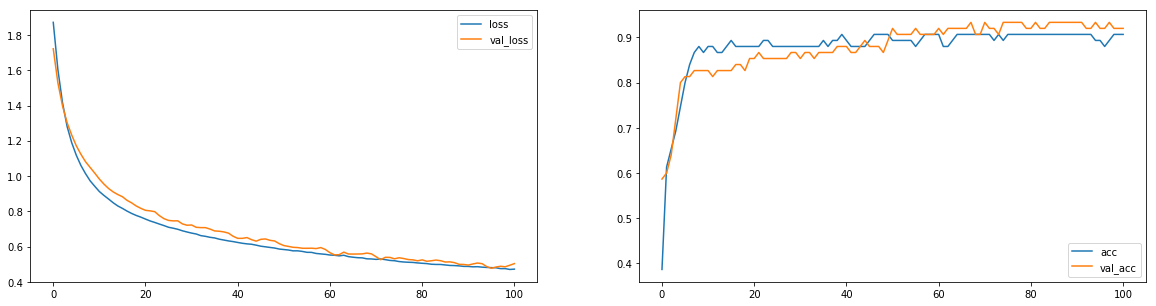

In [80]:
plot_losses = PlotLosses(plot_interval=100, 
                         evaluate_interval=None, 
                         x_val=X_test_scaled, 
                         y_val_categorical=y_test_cat)
model.fit(X_train_scaled, 
          y_train_cat, 
          batch_size = batch_size,
          epochs=epochs, 
          verbose=0, 
          validation_data=(X_test_scaled, y_test_cat), 
          callbacks=[plot_losses],
         )

10784/11328 [===========================>..] - ETA: 0s 

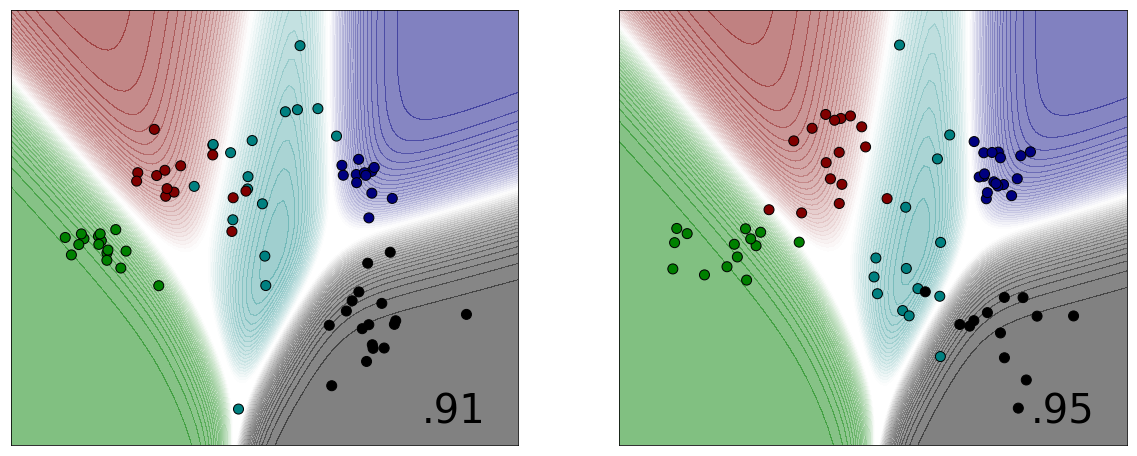

In [81]:
from softmax_helper import plot_boundaries_keras

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
score_train = model.evaluate(X_train_scaled, y_train_cat)
score_test = model.evaluate(X_test_scaled, y_test_cat)
Z_aux, Z = plot_boundaries_keras(X_train_scaled, y_train, score_train[1], model.predict_proba, h =.05, ax=ax1)
Z_aux, Z = plot_boundaries_keras(X_test_scaled, y_test, score_test[1], model.predict_proba, h =.05, ax=ax2)
plt.show()